<a href="https://colab.research.google.com/github/BIRBAHADUR07/Dance_Website/blob/main/detectron2_worked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

  Using cached Pillow-10.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-ebmk0par/detectron2_066c055a49134a54ab0fe8eeb9b90333
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-ebmk0par/detectron2_066c055a49134a54ab0fe8eeb9b90333
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
  Resolved https://github.com/facebookresearch/detectron2.git to commit 82a57ce0b70057685962b352535147d9a8118578
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install pdf2img

In [ ]:
import pdf2image
import numpy as np

In [ ]:
# pdf_file = 'attention.pdf'
# img = np.asarray(pdf2image.convert_from_path(pdf_file)[8])
# img = 'file.png'

In [ ]:
import PIL
from PIL import Image
# PIL.Image

# Load the PNG file
image = Image.open("file.png")


In [ ]:
!pip install --upgrade pillow==6.2.2


  Using cached Pillow-6.2.2-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: pillow
    Found existing installation: Pillow 10.0.0
    Uninstalling Pillow-10.0.0:
      Successfully uninstalled Pillow-10.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.4.3 requires pillow>=7.1.0, but you have pillow 6.2.2 which is incompatible.
detectron2 0.5 requires Pillow>=7.1, but you have pillow 6.2.2 which is incompatible.
dopamine-rl 4.0.6 requires Pillow>=7.0.0, but you have pillow 6.2.2 which is incompatible.
imageio 2.25.1 requires pillow>=8.3.2, but you have pillow 6.2.2 which is incompatible.
pdfplumber 0.10.1 requires Pillow>=9.1, but you have pillow 6.2.2 which is incompatible.
pytesseract 0.3.10 requires Pillow>=8.0.0, but you have pillow 6.2.2 which is incompatible.


In [ ]:
import layoutparser as lp

model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
	                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
	                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})


  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:
layout = model.detect(image)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
print(layout)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=213.99278259277344, y_1=1192.787109375, x_2=1003.3601684570312, y_2=1326.067626953125), text=None, id=None, type=Text, parent=None, next=None, score=0.9974678754806519), TextBlock(block=Rectangle(x_1=211.63502502441406, y_1=1400.9422607421875, x_2=1004.628173828125, y_2=1445.819580078125), text=None, id=None, type=Text, parent=None, next=None, score=0.9933978319168091), TextBlock(block=Rectangle(x_1=215.49270629882812, y_1=141.20779418945312, x_2=1009.0001220703125, y_2=228.3407440185547), text=None, id=None, type=Text, parent=None, next=None, score=0.9917603135108948), TextBlock(block=Rectangle(x_1=214.6303253173828, y_1=1357.02587890625, x_2=512.2788696289062, y_2=1382.0361328125), text=None, id=None, type=Title, parent=None, next=None, score=0.9915105700492859), TextBlock(block=Rectangle(x_1=216.33741760253906, y_1=263.36669921875, x_2=1017.670166015625, y_2=768.57666015625), text=None, id=None, type=Table, parent=None, next=None, score=

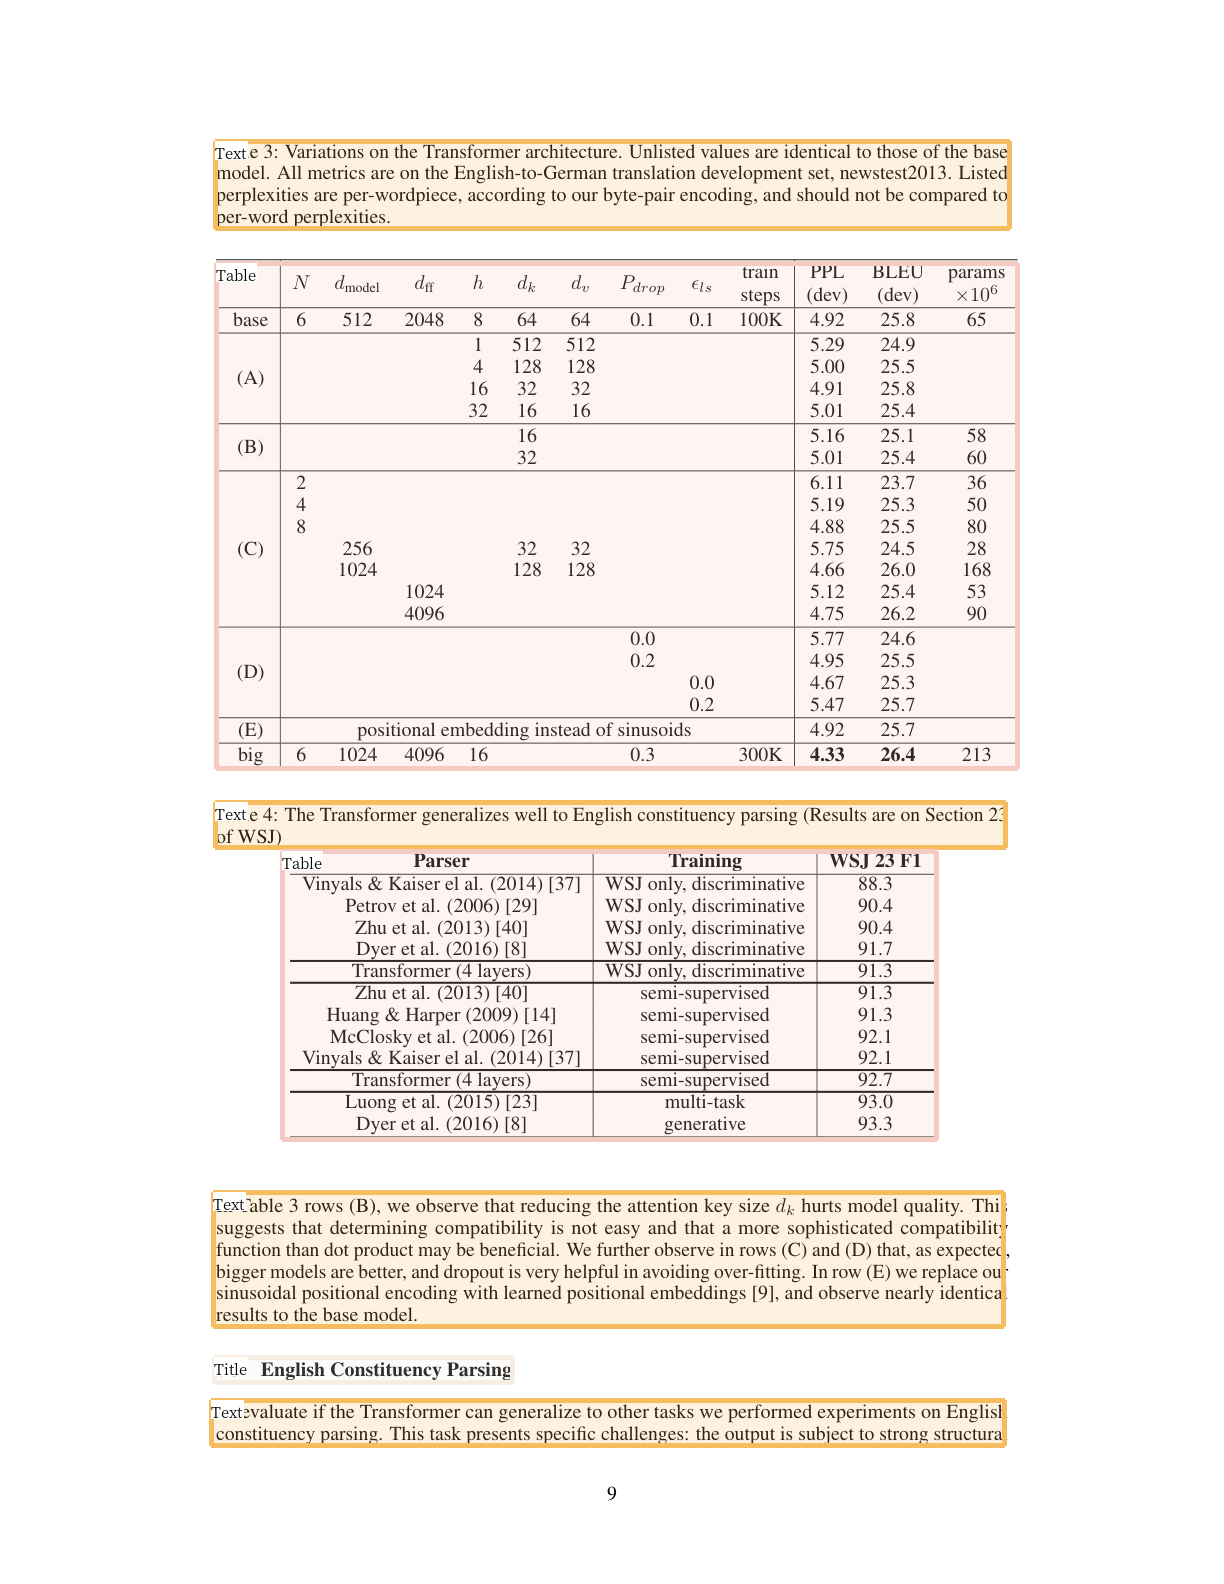

In [ ]:
lp.draw_box(image, layout,  box_width=5, box_alpha=0.2, show_element_type=True)


Firstly we filter text region of specific type:



In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [ ]:
print(text_blocks)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=215.49270629882812, y_1=141.20779418945312, x_2=1009.0001220703125, y_2=228.3407440185547), text=None, id=0, type=Text, parent=None, next=None, score=0.9917603135108948), TextBlock(block=Rectangle(x_1=215.44773864746094, y_1=802.9898071289062, x_2=1005.4686279296875, y_2=847.3411865234375), text=None, id=1, type=Text, parent=None, next=None, score=0.9882634878158569), TextBlock(block=Rectangle(x_1=213.99278259277344, y_1=1192.787109375, x_2=1003.3601684570312, y_2=1326.067626953125), text=None, id=2, type=Text, parent=None, next=None, score=0.9974678754806519), TextBlock(block=Rectangle(x_1=211.63502502441406, y_1=1400.9422607421875, x_2=1004.628173828125, y_2=1445.819580078125), text=None, id=3, type=Text, parent=None, next=None, score=0.9933978319168091)], page_data={})


As there could be text region detected inside the figure region, we just drop them

In [ ]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [ ]:
h, w = image.size[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

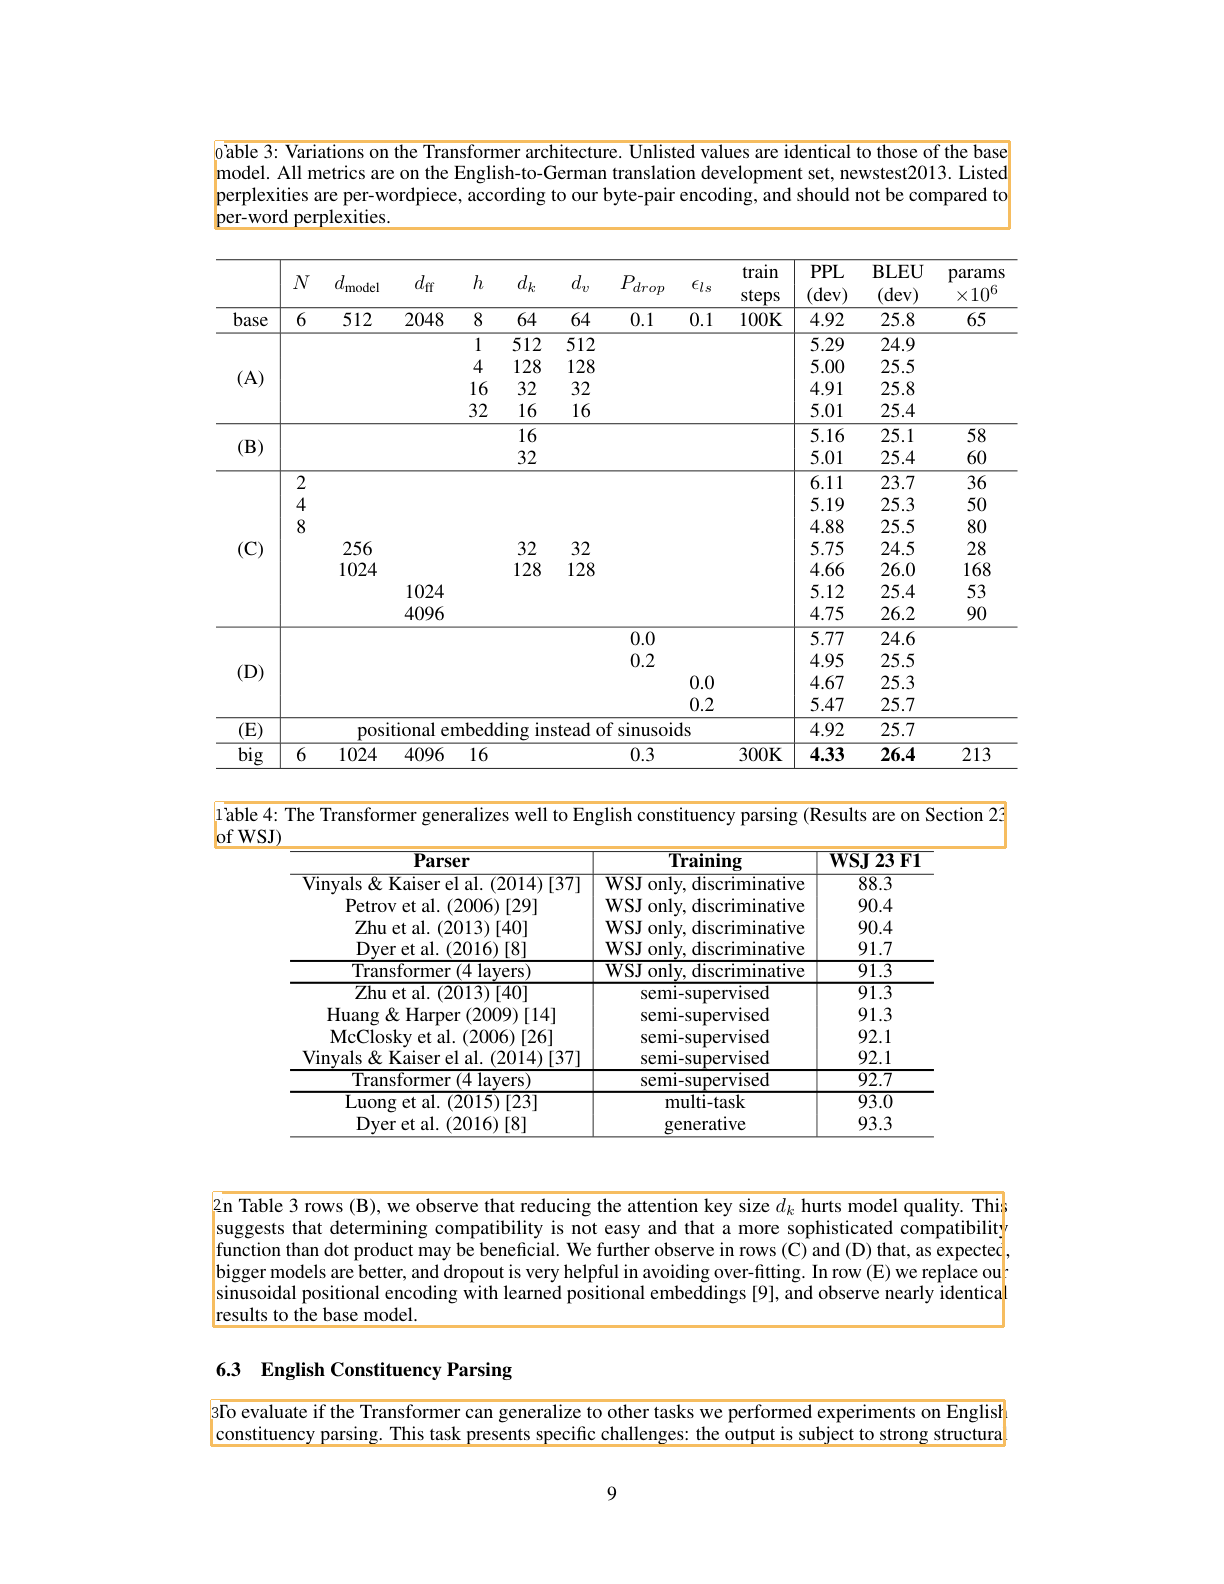

In [ ]:
lp.draw_box(image, text_blocks,
            box_width=3,
            show_element_id=True)

In [ ]:
!pip install layoutparser
!pip install layoutparser[ocr]

In [ ]:
# pip install layoutparser
# pip install "layoutparser[ocr]"

In [ ]:
!pip install pytesseract

In [ ]:
import layoutparser.ocr as ocr
ocr_agent = ocr.TesseractAgent()


In [ ]:
# image_arr = np.array(image)

In [ ]:
!pip install pytesseract

  Using cached Pillow-10.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2


In [ ]:
for i in text_blocks:
  print(i)

TextBlock(block=Rectangle(x_1=215.49270629882812, y_1=141.20779418945312, x_2=1009.0001220703125, y_2=228.3407440185547), text=None, id=0, type=Text, parent=None, next=None, score=0.9917603135108948)
TextBlock(block=Rectangle(x_1=215.44773864746094, y_1=802.9898071289062, x_2=1005.4686279296875, y_2=847.3411865234375), text=None, id=1, type=Text, parent=None, next=None, score=0.9882634878158569)
TextBlock(block=Rectangle(x_1=213.99278259277344, y_1=1192.787109375, x_2=1003.3601684570312, y_2=1326.067626953125), text=None, id=2, type=Text, parent=None, next=None, score=0.9974678754806519)
TextBlock(block=Rectangle(x_1=211.63502502441406, y_1=1400.9422607421875, x_2=1004.628173828125, y_2=1445.819580078125), text=None, id=3, type=Text, parent=None, next=None, score=0.9933978319168091)


In [ ]:
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=215.49270629882812, y_1=141.20779418945312, x_2=1009.0001220703125, y_2=228.3407440185547), text=None, id=0, type=Text, parent=None, next=None, score=0.9917603135108948), TextBlock(block=Rectangle(x_1=215.44773864746094, y_1=802.9898071289062, x_2=1005.4686279296875, y_2=847.3411865234375), text=None, id=1, type=Text, parent=None, next=None, score=0.9882634878158569), TextBlock(block=Rectangle(x_1=213.99278259277344, y_1=1192.787109375, x_2=1003.3601684570312, y_2=1326.067626953125), text=None, id=2, type=Text, parent=None, next=None, score=0.9974678754806519), TextBlock(block=Rectangle(x_1=211.63502502441406, y_1=1400.9422607421875, x_2=1004.628173828125, y_2=1445.819580078125), text=None, id=3, type=Text, parent=None, next=None, score=0.9933978319168091)], page_data={})

In [ ]:
for i in text_blocks.get_texts():
  print(i)

None
None
None
None


In [ ]:
os.environ=[]

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
for block in text_blocks:
    print(type(block))



    x, y, width, height = block.coordinates
    print(x,y,width,height)
# Crop the image to the region of the TextBlock
    cropped_image = image.crop((x, y, x + width, y + height))
    # cropped_image=np.array(cropped_image)
    # cv2_imshow(cropped_image)
    # block=np.array(block)
    # segment_image = (block
    #                    .pad(left=5, right=5, top=5, bottom=5)
    #                    .crop_image(image))
    #     # add padding in each image segment can help
        # improve robustness
    print(pytesseract.image_to_string(cropped_image))

    # text = ocr_agent.detect(cropped_image)
    # block.set(text=text, inplace=True)

<class 'layoutparser.elements.layout_elements.TextBlock'>
215.49270629882812 141.20779418945312 1009.0001220703125 228.3407440185547


TesseractError: ignored

In [ ]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

In [ ]:
import os
os.environ["TESSDATA_PREFIX"]='/usr/local/bin/pytesseract'

In [ ]:
pytesseract.pytesseract.tesseract_cmd = '/usr/local/bin/pytesseract'

In [ ]:
import pytesseract